# Performance Perdiction of student in Exam

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
Data= pd.read_csv(r"C:\Users\lenovo\downloads\StudentsPerformance.csv")

In [5]:
Data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
Data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
Data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


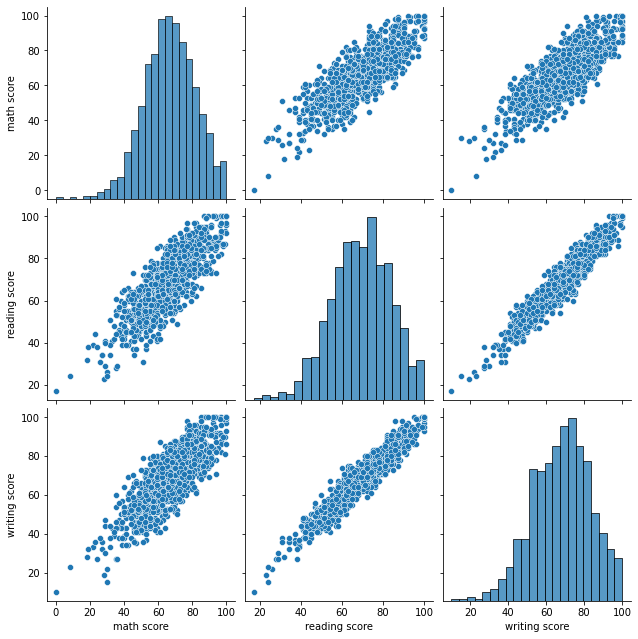

In [19]:
sns.pairplot(Data[['math score', 'reading score', 'writing score']], height = 3)

<AxesSubplot:>

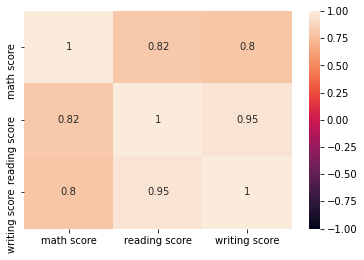

In [21]:
sns.heatmap(Data.corr(),vmin=-1,annot=True)

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

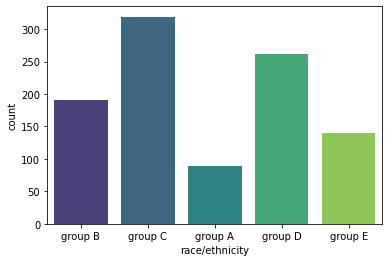

In [23]:
sns.countplot(x='race/ethnicity',data=Data,palette='viridis')

<AxesSubplot:xlabel='writing score', ylabel='Count'>

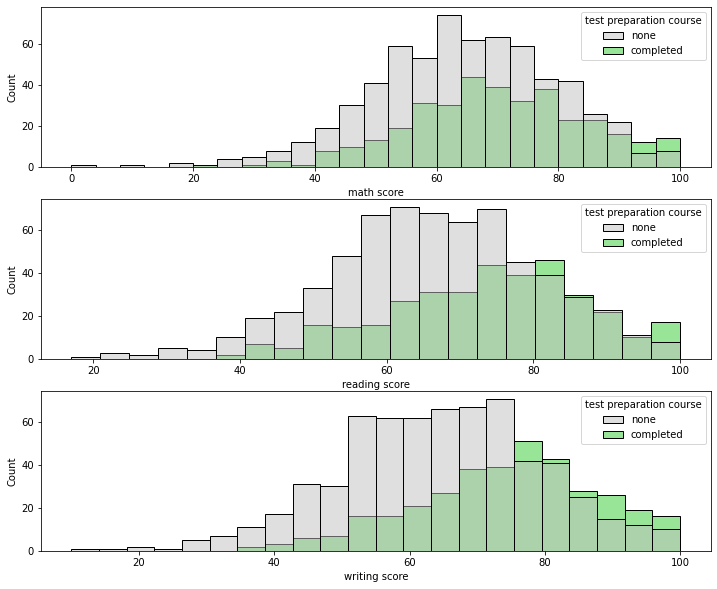

In [24]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.histplot(ax=axes[0],x='math score',data=Data,
             hue='test preparation course',palette=["silver",'limegreen']) 

sns.histplot(ax=axes[1],x='reading score',data=Data,
             hue='test preparation course',palette=["silver",'limegreen'])

sns.histplot(ax=axes[2],x='writing score',data=Data,
             hue='test preparation course',palette=["silver",'limegreen'])

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

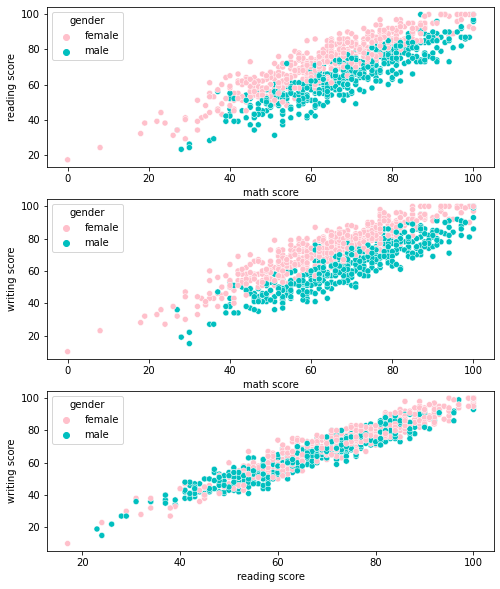

In [25]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

sns.scatterplot(ax=axes[0],x='math score',y='reading score',
                data=Data,hue='gender', palette=["pink",'c'])

sns.scatterplot(ax=axes[1],x='math score',y='writing score',
                data=Data,hue='gender', palette=["pink",'c'])

sns.scatterplot(ax=axes[2],x='reading score',y='writing score',
                data=Data,hue='gender', palette=["pink",'c'])

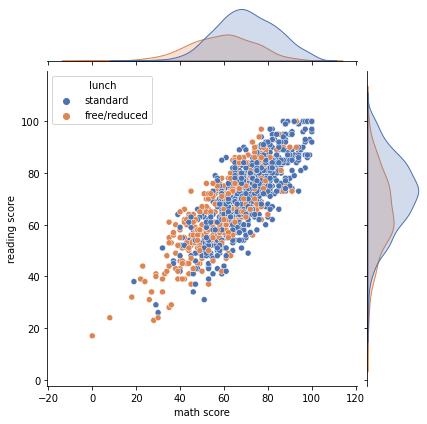

In [26]:
sns.jointplot(x='math score',y='reading score',data=Data,hue='lunch',palette='deep')

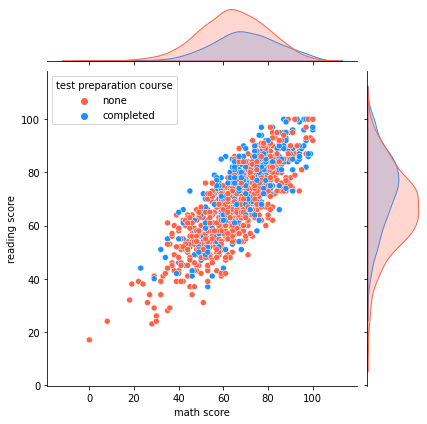

In [27]:
sns.jointplot(x='math score',y='reading score',data=Data,
              hue='test preparation course',palette=['tomato','dodgerblue'])

In [30]:
#Adding overall Score and Grades column
def grader(x):  # a function to generate grades 
    if x>85:
        return 'A'
    elif (x>70 and x<= 85):
        return 'B'
    elif (x>55 and x<=70):
        return 'C' 
    elif (x>40 and x<=55):
        return 'D'
    else:
        return 'E'


In [31]:
Data['overall score'] = (Data['math score'] + Data['writing score'] + Data['reading score'])/3

Data['grade'] = Data['overall score'].apply(grader) 

<AxesSubplot:xlabel='grade', ylabel='count'>

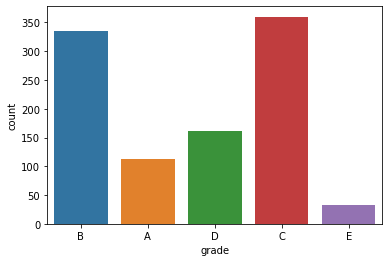

In [32]:
sns.countplot(x='grade',data=Data)

<AxesSubplot:xlabel='overall score', ylabel='Count'>

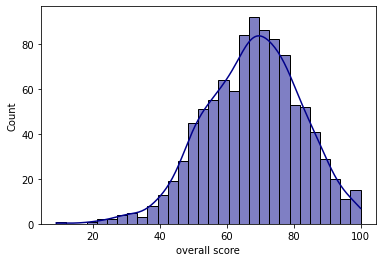

In [33]:
sns.histplot(x='overall score',data =Data,bins=30,kde=True,color='darkblue')

<AxesSubplot:xlabel='parental level of education', ylabel='overall score'>

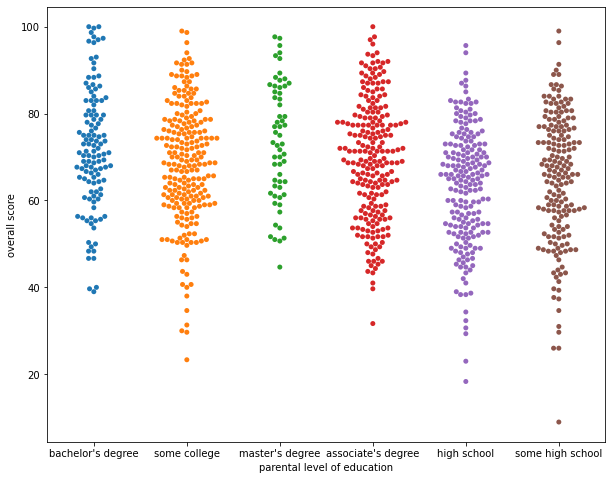

In [34]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='parental level of education',y='overall score',data=Data)

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

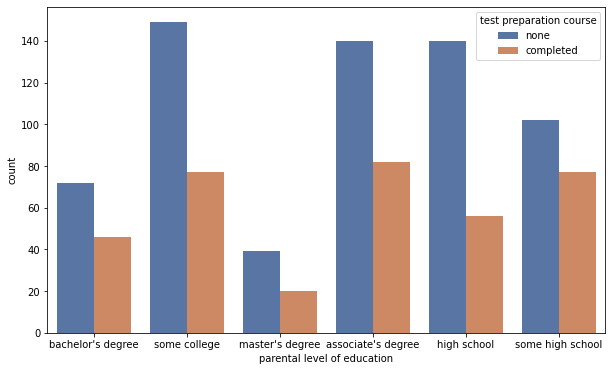

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='parental level of education',data=Data,palette='deep',hue='test preparation course')

<AxesSubplot:xlabel='reading score', ylabel='math score'>

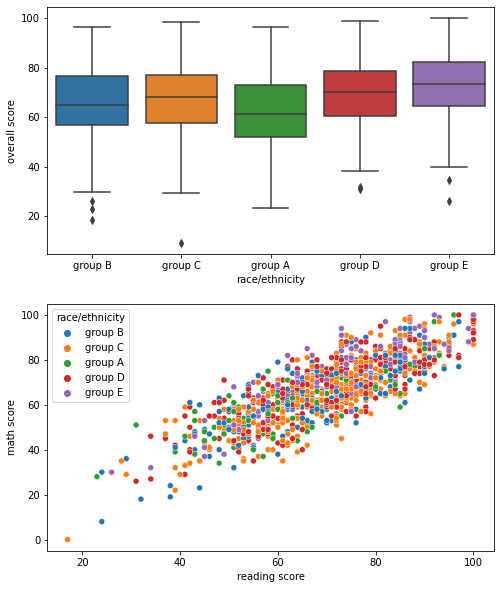

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.boxplot(ax=axes[0],x='race/ethnicity',
            y='overall score',data=Data)

sns.scatterplot(ax=axes[1],x='reading score',
                y='math score', hue='race/ethnicity',data=Data)